<a href="https://colab.research.google.com/github/LollaGavrishko/ML/blob/main/lesson3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import random
import numpy as np
# случайные числа которые появляются в ходе работы нейронной сети
random.seed(0) #случайный генератор
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True # детерминация cudn
import sklearn.datasets

In [ ]:
wine = sklearn.datasets.load_wine()
wine.data.shape # датасет вин

(178, 13)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2], # первые две колонки датасета
    wine.target, # таргет
    test_size=0.3, # отрезаем 30 процентов данных
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

NameError: ignored

In [ ]:
class WineNet(torch.nn.Module): # нейросеть для классификации
    def __init__(self, n_hidden_neurons): # количество скрытых нейронов
        super(WineNet, self).__init__()
        # будет два скрытых слоя
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons) # первый слой
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons) # первый скрытый слой
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3) # второй скрытый слой
        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x): # реализация графа нейронной сети
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x): # функция для вычисления вероятности
        x = self.forward(x)
        x = self.sm(x)
        return x

wine_net = WineNet(5) # количество скрытых нейронов

In [ ]:
loss = torch.nn.CrossEntropyLoss()  # функция потерь

optimizer = torch.optim.Adam(wine_net.parameters(),  # оптимайзер для вычисления градиентных шагов
                             lr=1.0e-3)

In [ ]:
np.random.permutation(5) #

array([2, 0, 1, 4, 3])

In [ ]:
batch_size = 10 # один батч состоящий из 10 частей

for epoch in range(5000):
    order = np.random.permutation(len(X_train)) # каждую эпоху идет перемешивание датасета
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size] # вычисление некоторого подмножества

        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = wine_net.forward(x_batch) # пропускаем батч через нейросеть, получаем некоторое предсказание

        loss_value = loss(preds, y_batch)
        loss_value.backward() # считаем производную потерь

        optimizer.step()

    if epoch % 100 == 0: # вычисляем метрики каждые сто эпох по тестовым данным
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.4074)
tensor(0.4074)
tensor(0.4630)
tensor(0.5000)
tensor(0.4259)
tensor(0.4074)
tensor(0.5185)
tensor(0.5185)
tensor(0.4444)
tensor(0.4259)
tensor(0.5000)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.7407)
tensor(0.6852)
tensor(0.6481)
tensor(0.6852)
tensor(0.6667)
tensor(0.6852)
tensor(0.6852)
tensor(0.6852)
tensor(0.7222)
tensor(0.7037)
tensor(0.7407)
tensor(0.7593)
tensor(0.7778)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)


/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
<ipython-input-8-381b27b71df2>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  plt.scatter(X_train[indexes, 0],
<ipython-input-8-381b27b71df2>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[indexes, 0],


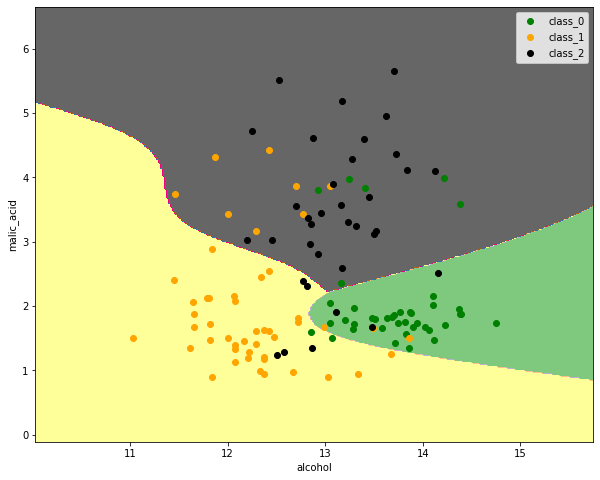

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# визуализация датасета. На графике точками обозначен трейновый датасет, а заполненные области - то как бы нейросеть классифицировала эти точки
plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0],
                X_train[indexes, 1],
                c=color,
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

# Вторая часть задания


In [ ]:
import torch
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()
features = 13 # use 13 features

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :features],
    wine.target,
    test_size=0.3,
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
class WineNet(torch.nn.Module):
    def __init__(self,n_input, n_hidden_neurons):
        super(WineNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_input, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons,3)
        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

n_input = 2  # choose number of input neurons
n_hidden = 19 # choose number of hidden neurons При n_hidden=19 задача решается без изменения остальных параметров.
wine_net = WineNet(n_input, n_hidden)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 15# choose different batch sizes

for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = wine_net.forward(x_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    if epoch % 10 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.2407)
tensor(0.4074)
tensor(0.4074)
tensor(0.3889)
tensor(0.4074)
tensor(0.4630)
tensor(0.4815)
tensor(0.5000)
tensor(0.5185)
tensor(0.4630)
tensor(0.4630)
tensor(0.4630)
tensor(0.4630)
tensor(0.4815)
tensor(0.4815)
tensor(0.4815)
tensor(0.5926)
tensor(0.4815)
tensor(0.5000)
tensor(0.4815)
tensor(0.4815)
tensor(0.6667)
tensor(0.5370)
tensor(0.6481)
tensor(0.5370)
tensor(0.6296)
tensor(0.7037)
tensor(0.6296)
tensor(0.7222)
tensor(0.7593)
tensor(0.7407)
tensor(0.7593)
tensor(0.7593)
tensor(0.6852)
tensor(0.7593)
tensor(0.7593)
tensor(0.7222)
tensor(0.7593)
tensor(0.7963)
tensor(0.7963)
tensor(0.7963)
tensor(0.7593)
tensor(0.7778)
tensor(0.7963)
tensor(0.7963)
tensor(0.7963)
tensor(0.7963)
tensor(0.7778)
tensor(0.7963)
tensor(0.7963)
tensor(0.8148)
tensor(0.7963)
tensor(0.8148)
tensor(0.7963)
tensor(0.8148)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.7778)
tensor(0.8148)
tensor(0.8333)
tensor(0.7963)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.7963)
tensor(0.7

In [ ]:
print(wine_net.fc1.in_features, np.asarray((test_preds == y_test).float().mean()) > 0.8)
# need to get 13 True

2 True


In [ ]:
x = torch.ones([6000, 28, 28], dtype=torch.int32)
print(x.shape)
#print(x.reshape(-1, 9).shape)
print(x.reshape(-1,6000).shape)
print(x.reshape(len(x[1]), len(x), len(x[2])).shape)
print(x.reshape(-1).shape)
print(x.reshape(-1,1,1).shape)
print(x.reshape(-1,14,32,7).shape)

torch.Size([6000, 28, 28])
torch.Size([784, 6000])
torch.Size([28, 6000, 28])
torch.Size([4704000])
torch.Size([4704000, 1, 1])
torch.Size([1500, 14, 32, 7])
